## <center> Линейная регрессия

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# библиотека для машинного обучения sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# еще одна библиотека конкретно для статистических и временных моделей
# !pip install statsmodels #установка библиотеки
# import statsmodels.api as sm

In [6]:
# Считываем данные из файла
df = pd.read_excel('data_house_prices_2_clean.xlsx')
df

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,380000,8450,2003,2003,196,8,2996.000000,20081
1,181500,9600,1976,1976,0,6,7606.000000,15171
2,223500,11250,2001,2002,162,6,5856.000000,17368
3,140000,9550,1915,1970,0,7,4789.000000,21808
4,250000,14260,2000,2000,350,9,1248.000000,16240
...,...,...,...,...,...,...,...,...
95,185000,9765,1993,1993,68,6,3950.000000,20853
96,214000,10264,1999,1999,183,6,4182.000000,12897
97,94750,10921,1965,1965,48,6,3763.429695,25023
98,83000,10625,1920,1950,0,5,203.000000,23344


#### Диаграммы рассеяния

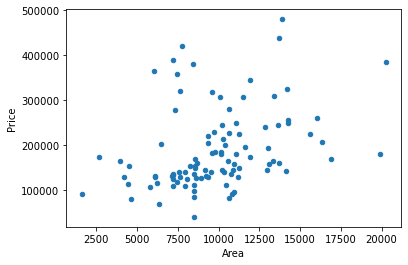

In [4]:
df.plot(x='Area',y='Price',kind='scatter');

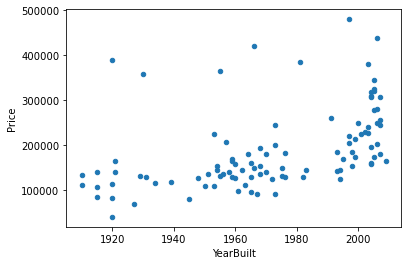

In [5]:
df.plot(x='YearBuilt',y='Price',kind='scatter');

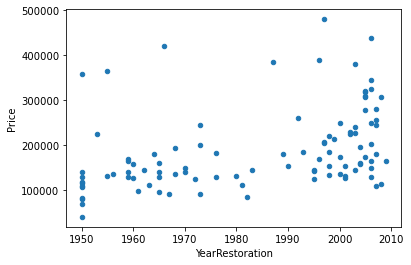

In [6]:
df.plot(x='YearRestoration',y='Price',kind='scatter');


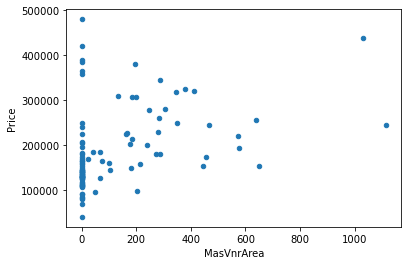

In [7]:
df.plot(x='MasVnrArea',y='Price',kind='scatter');


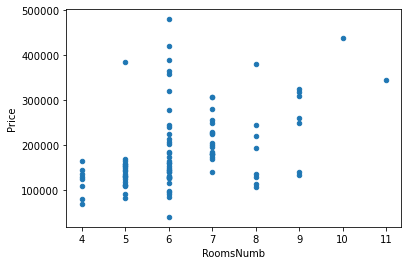

In [8]:
df.plot(x='RoomsNumb',y='Price',kind='scatter');

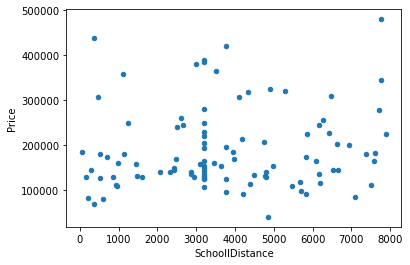

In [9]:
df.plot(x='SchoollDistance',y='Price',kind='scatter');

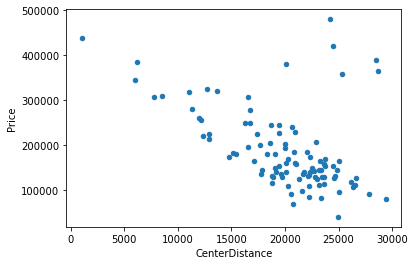

In [10]:
df.plot(x='CenterDistance',y='Price',kind='scatter');

####  Корреляционная матрица

In [11]:
df.corr()

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
Price,1.000000,0.339995,0.465742,0.389326,0.380489,0.442164,0.106592,-0.482399
Area,0.339995,1.000000,0.260769,0.172652,0.198293,0.252269,0.068671,-0.467764
YearBuilt,0.465742,0.260769,1.000000,0.615053,0.374728,0.212181,0.024687,-0.511358
YearRestoration,0.389326,0.172652,0.615053,1.000000,0.267697,0.255801,0.049462,-0.364069
MasVnrArea,0.380489,0.198293,0.374728,0.267697,1.000000,0.436917,0.033243,-0.479798
RoomsNumb,0.442164,0.252269,0.212181,0.255801,0.436917,1.000000,0.104830,-0.520214
SchoollDistance,0.106592,0.068671,0.024687,0.049462,0.033243,0.104830,1.000000,-0.107494
CenterDistance,-0.482399,-0.467764,-0.511358,-0.364069,-0.479798,-0.520214,-0.107494,1.000000


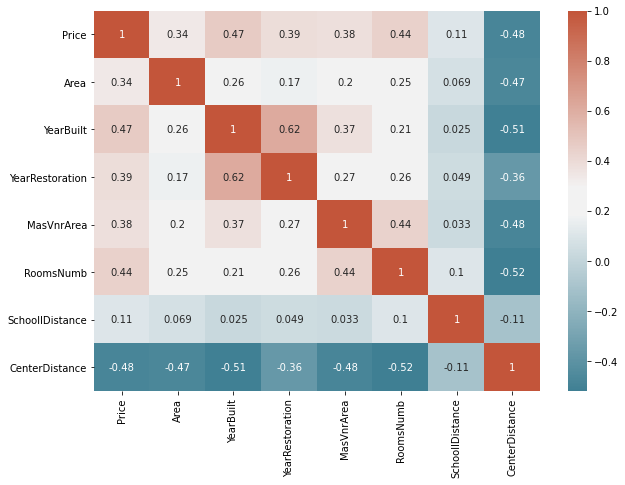

In [12]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(),cmap=cmap,  annot=True);

### <center> Построение модели регрессии

### Однофакторная регрессия

**Первая модель**

Построим однофакторную регрессионную модель. В качестве фактора (признака) выберем тот, который больше всего коррелирует с ценой. Таким фактором является  ***CenterDistance***

In [48]:
# Формируем X и y для построения модели
x = df[['CenterDistance']]
y = df['Price']


# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_1 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_1)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_1))

R2:  0.23270905237113315
Mean absolute error (MAE) 51785.651972814405


Посмотрим параметры полученной модели: сдвиг/свободный член **b0** и коэффициент перед x **b1** 

In [37]:
# коэффициенты модели
reg_model.coef_

array([-8.32862368])

In [38]:
# свободный член (сдвиг)
reg_model.intercept_

355256.11724330985

**Реализация из библиотеки statmodels**

In [133]:
y = df['Price']
x = df['CenterDistance']
# необходимо добавить константу 1 для корректной работы модели
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
pred_1 = results.predict(x)
print(results.summary())
# print('R2: ', results.rsquared)
# print('Parameters: ', results.params)
# print('\nMean absolute error (MAE)', sm.tools.eval_measures.meanabs(y, pred_1))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     29.72
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           3.73e-07
Time:                        17:27:18   Log-Likelihood:                -1268.0
No. Observations:                 100   AIC:                             2540.
Df Residuals:                      98   BIC:                             2545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.553e+05   3.14e+04     11.

Нарисуем линию регрессии и посмотрим, насколько хорошо она описывает поведение данных

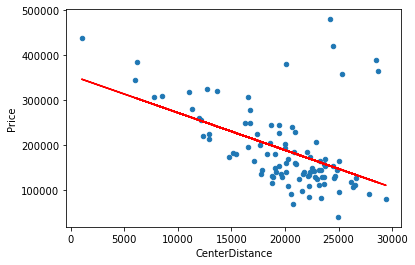

In [17]:
df.plot(x='CenterDistance', y='Price', kind='scatter')
plt.plot(df['CenterDistance'], predictions_1, color='red');

Попробуем построить предсказание для новых данных. Для этого в обученную моделеь передаем значения признака X, для которого хотим сделать прогноз

In [24]:
test = pd.DataFrame({'CenterDistance':[5565, 2022]})
x = test[['CenterDistance']]
reg_model.predict(x)

array([308907.32648022, 338415.6401682 ])

#### Анализ остатков

In [85]:
residuals = pd.DataFrame({'Price':df['Price'],
                          'Predictions':pred_1})
residuals.head()

,Price,Predictions
0,380000,188009.025183
1,181500,228902.567438
2,223500,210604.581219
3,140000,173625.492093
4,250000,219999.268727


In [86]:
residuals['Errors'] = residuals['Price']-residuals['Predictions']
residuals.head()

,Price,Predictions,Errors
0,380000,188009.025183,191990.974817
1,181500,228902.567438,-47402.567438
2,223500,210604.581219,12895.418781
3,140000,173625.492093,-33625.492093
4,250000,219999.268727,30000.731273


Построим диаграмму рассеяния ошибок

<AxesSubplot:>

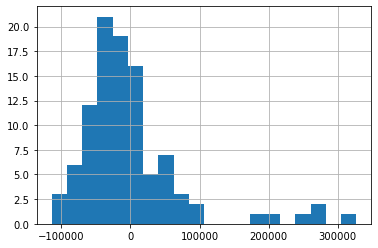

In [87]:
residuals['Errors'].hist(bins=20)

<AxesSubplot:xlabel='Price', ylabel='Errors'>

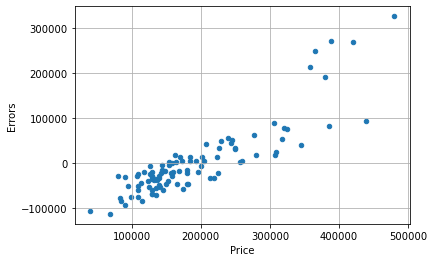

In [33]:
residuals.plot(x='Price',y='Errors',kind='scatter',grid=True)

**Можем ли мы как-то улучшить результат?** 

Если посмотреть на диаграмму рассеяния признака ***CenterDistance*** в зависимости от цены, то увидим, что в данных есть выбросы (несколько точек в правом верхнем углу). Можно попробовать убрать их из данных и попробовать построить модель без них

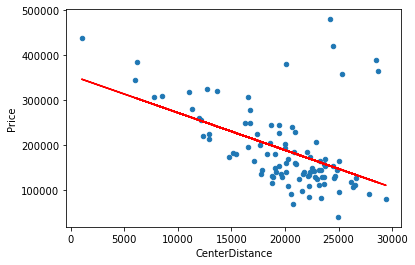

In [34]:
df.plot(x='CenterDistance',y='Price',kind='scatter')
plt.plot(df['CenterDistance'], predictions_1,color='red');

#### Модель без выбросов

In [35]:
df[(df['CenterDistance']>20000)&(df['Price']>300000)]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,380000,8450,2003,2003,196,8,2996.000000,20081
21,358000,7449,1930,1950,0,6,1116.000000,25316
39,365000,6040,1955,1955,0,6,3521.000000,28677
49,420000,7742,1966,1966,0,6,3763.429695,24438
50,480000,13869,1997,1997,0,6,7757.000000,24231
61,389000,7200,1920,1996,0,6,3202.216495,28475


In [52]:
# Находим индексы выбросов и удаляем их
ind = df[(df['CenterDistance']>20000)&(df['Price']>300000)].index
clean_data = df.drop(ind, axis='index')

In [54]:
# Формируем X и y для построения модели на данных без выбросов
x = clean_data[['CenterDistance']]
y = clean_data['Price']

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_2 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_2)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_2))

R2:  0.6960862985951268
Mean absolute error (MAE) 32605.370081542103


Посмотрим, как теперь проходил линия регрессии через данные

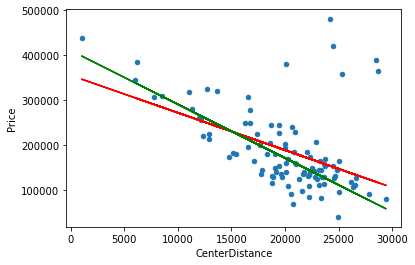

In [60]:
df.plot(x='CenterDistance',y='Price',kind='scatter')
plt.plot(df['CenterDistance'], pred_1, color='red')
plt.plot(clean_data['CenterDistance'], pred_2,color='green')

Посмотрим, как изменилось распределение остатков

In [82]:
residuals2 = pd.DataFrame({'Price':clean_data['Price'],
                          'Predictions':pred_2})
residuals2['Errors'] = residuals2['Price']-residuals2['Predictions']

<AxesSubplot:>

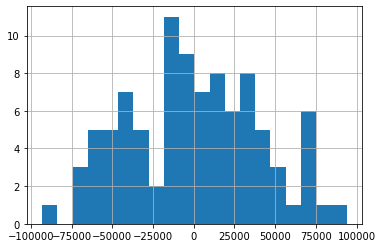

In [83]:
residuals2['Errors'].hist(bins=20)

<AxesSubplot:>

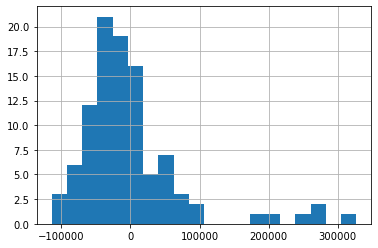

In [88]:
residuals['Errors'].hist(bins=20)

<AxesSubplot:xlabel='Price', ylabel='Errors'>

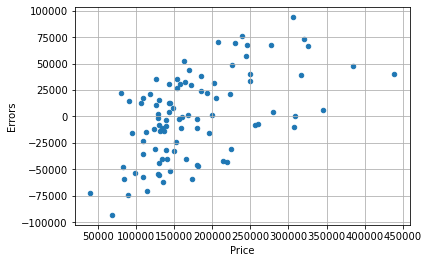

In [89]:
residuals2.plot(x='Price',y='Errors',kind='scatter',grid=True)

<AxesSubplot:xlabel='Price', ylabel='Errors'>

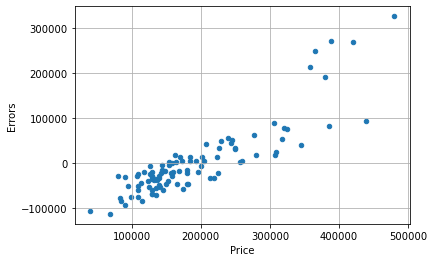

In [90]:
residuals.plot(x='Price',y='Errors',kind='scatter',grid=True)

IndexError: too many indices for array

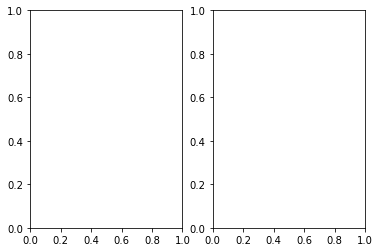

In [80]:
fig, axs = plt.subplots(1,2)
# fig.suptitle('Распределение ошибок/остатков ')
axs[0, 0].hist(residuals['Errors'], bins=20)
axs[0, 1].hist(residuals2['Errors'], bins=20)

# print('Модель с выбросами')
# plt.subplot()

# residuals['Errors'].hist(bins=20)
# print('Модель без выбросов')
# residuals2['Errors'].hist(bins=20)

# residuals.plot(x='Price',y='Errors',kind='scatter',grid=True)

### Многофакторная регрессионная модель

**Модель на данных с выбросами**

In [103]:
# Формируем X и y для построения модели
x = df[['Area','CenterDistance','YearBuilt', 'YearRestoration', 'MasVnrArea','RoomsNumb', 'SchoollDistance']]
y = df['Price']

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_3 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_3)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_3))

R2:  0.38444051900962983
Mean absolute error (MAE) 42312.14699342288


In [92]:
# коэффициенты модели
reg_model.coef_

array([ 3.72672282e+00, -1.46991472e+00,  7.27611379e+02,  4.21006071e+02,
        3.67900319e+01,  1.52755799e+04,  2.00920326e+00])

In [93]:
# свободный член (сдвиг)
reg_model.intercept_

-2195509.6818187376

Порядок коэффициентов во множественной регрессии такой же, как и порядок признаков. Для удобства анализа соберем их в датафрейм

In [102]:
coef_df = pd.DataFrame(reg_model.coef_.reshape(1,-1),  columns=x.columns)
coef_df

,Area,CenterDistance,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance
0,3.726723,-1.469915,727.611379,421.006071,36.790032,15275.579884,2.009203


**Модель на данных без выбросов**

Видим, что без выбросов модель намного лучше: R-квадрат близок к 1, метрика МАЕ также стала существенно ниже

In [104]:
# Формируем X и y для построения модели
x = clean_data[['Area','CenterDistance','YearBuilt', 'YearRestoration', 'MasVnrArea','RoomsNumb', 'SchoollDistance']]
y = clean_data['Price']

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_4 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_4)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_4))

R2:  0.8382293133675165
Mean absolute error (MAE) 22477.60784072853


Посмотрим, как на многофакторной модели без выбросов ведут себя остатки

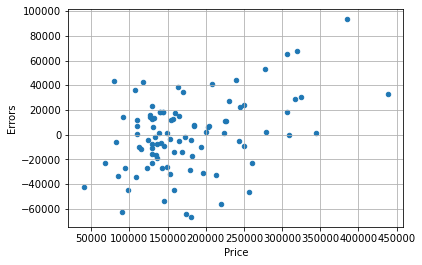

In [110]:
# Проверка остатков
residuals = pd.DataFrame({'Price':clean_data['Price'],'Predictions':pred_4})
residuals['Errors'] = residuals['Price']-residuals['Predictions']
residuals.plot(x='Price',y='Errors',kind='scatter',grid=True);

<AxesSubplot:>

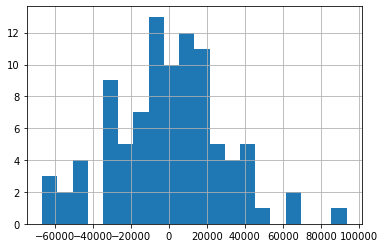

In [111]:
residuals['Errors'].hist(bins=20)

Распределение остатков близко к нормальному. Модель можно считать, что построенная модель довольно адекватная

### Прогноз значений

Создадим датафрейм с данными для прогноза

In [114]:
new_record = pd.DataFrame({'Area':[12450], 
                           'YearBuilt':[2005],
                           'YearRestoration':[2007], 
                           'MasVnrArea':[126],
                           'RoomsNumb':[10],
                           'SchoollDistance':[12000],
                           'CenterDistance:':[16887]})

In [117]:
reg_model.predict(new_record) 

array([68505716.30626725])

Считаем данные для прогноза из файла

In [118]:
rec = pd.read_excel("data_house_prices_2_predict.xlsx")
rec_x = rec[['Area', 'YearBuilt', 'YearRestoration', 'MasVnrArea','RoomsNumb', 'SchoollDistance', 'CenterDistance']]
rec_x

,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,8456,2000,2003,200,5,2996,20081
1,5000,1976,1976,0,3,5000,15171
2,11250,2001,2002,162,6,3020,10222


In [124]:
predict_new = reg_model.predict(rec_x)
# Округлим предсказания до 2-х знаков после запятой
np.round(predict_new, 2)

array([16566795.52, 27990571.46, 16681323.7 ])

#### Перебор, без каких признаков модель лучше

Один из самых простых вариантов анализа модели - поочередное выкидывание признаков. Логично, что чем более значимым является признак для модели, тем хуже качество прогноза без него. 

**Важно!** Так как модель линейная, то когда мы говорим об анализе значимости признаков таким способом, имеется в виду значимость с точки зрения наличия ***линейной*** связи между признаком и целевой переменной. Другой тип свяли линейная модель не умеет выявлять :)

In [128]:
for col in x.columns[1:]:
    tmp = clean_data.drop([col,'Price'],axis='columns')
    print('Убрали признак: ', col)
    y_tmp = clean_data['Price']
    x_tmp = sm.add_constant(tmp)
    model_tmp = LinearRegression() 
    model_tmp.fit(x_tmp, y_tmp)
    preds =  model_tmp.predict(x_tmp)
    print('R2: ', r2_score(y, preds)) # reg_model.score
    print('Mean absolute error (MAE)', mean_absolute_error(y, preds))
    print('_'*50)

Убрали признак:  CenterDistance
R2:  0.7345006096770892
Mean absolute error (MAE) 27499.60406048378
__________________________________________________
Убрали признак:  YearBuilt
R2:  0.8177505567202031
Mean absolute error (MAE) 24468.689342551774
__________________________________________________
Убрали признак:  YearRestoration
R2:  0.8227378061727559
Mean absolute error (MAE) 23756.026142103765
__________________________________________________
Убрали признак:  MasVnrArea
R2:  0.8229917814305108
Mean absolute error (MAE) 23943.858043947355
__________________________________________________
Убрали признак:  RoomsNumb
R2:  0.8298558613307302
Mean absolute error (MAE) 23701.398149132143
__________________________________________________
Убрали признак:  SchoollDistance
R2:  0.8372005127973937
Mean absolute error (MAE) 22483.49523507558
__________________________________________________
